# Problem 1:
#### Clustering:

#### Digital Ads Data:

The ads24x7 is a Digital Marketing company which has now got seed funding of $10 Million. They are expanding their wings in Marketing Analytics. They collected data from their Marketing Intelligence team and now wants you (their newly appointed data analyst) to segment type of ads based on the features provided. Use Clustering procedure to segment ads into homogeneous groups.

### 1. Read the data and perform basic analysis such as printing a few rows (head and tail), info, data summary,                null values duplicate values, etc.

# Import libraries and load data

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel("Clustering Clean Ads_Data-2.xlsx")

In [3]:
data.head()

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,2020-9-2-17,Format1,300,250,75000,Inter222,Video,Desktop,Display,1806,325,323,1,0.0,0.35,0.0,0.0031,0.0,0.0
1,2020-9-2-10,Format1,300,250,75000,Inter227,App,Mobile,Video,1780,285,285,1,0.0,0.35,0.0,0.0035,0.0,0.0
2,2020-9-1-22,Format1,300,250,75000,Inter222,Video,Desktop,Display,2727,356,355,1,0.0,0.35,0.0,0.0028,0.0,0.0
3,2020-9-3-20,Format1,300,250,75000,Inter228,Video,Mobile,Video,2430,497,495,1,0.0,0.35,0.0,0.0020,0.0,0.0
4,2020-9-4-15,Format1,300,250,75000,Inter217,Web,Desktop,Video,1218,242,242,1,0.0,0.35,0.0,0.0041,0.0,0.0


In [4]:
data.tail()

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
23061,2020-9-13-7,Format5,720,300,216000,Inter220,Web,Mobile,Video,1,1,1,1,0.07,0.35,0.0455,NaN,NaN,NaN
23062,2020-11-2-7,Format5,720,300,216000,Inter224,Web,Desktop,Video,3,2,2,1,0.04,0.35,0.0260,NaN,NaN,NaN
23063,2020-9-14-22,Format5,720,300,216000,Inter218,App,Mobile,Video,2,1,1,1,0.05,0.35,0.0325,NaN,NaN,NaN
23064,2020-11-18-2,Format4,120,600,72000,inter230,Video,Mobile,Video,7,1,1,1,0.07,0.35,0.0455,NaN,NaN,NaN
23065,2020-9-14-0,Format5,720,300,216000,Inter221,App,Mobile,Video,2,2,2,1,0.09,0.35,0.0585,NaN,NaN,NaN


In [46]:
print("There are {} number of rows and {} number of columns in the data.".format(data.shape[0],data.shape[1]))

There are 23066 number of rows and 19 number of columns in the data.


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066 entries, 0 to 23065
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Timestamp              23066 non-null  object 
 1   InventoryType          23066 non-null  object 
 2   Ad - Length            23066 non-null  int64  
 3   Ad- Width              23066 non-null  int64  
 4   Ad Size                23066 non-null  int64  
 5   Ad Type                23066 non-null  object 
 6   Platform               23066 non-null  object 
 7   Device Type            23066 non-null  object 
 8   Format                 23066 non-null  object 
 9   Available_Impressions  23066 non-null  int64  
 10  Matched_Queries        23066 non-null  int64  
 11  Impressions            23066 non-null  int64  
 12  Clicks                 23066 non-null  int64  
 13  Spend                  23066 non-null  float64
 14  Fee                    23066 non-null  float64
 15  Re

In [48]:
print("There are {} duplicate values in the dataset".format(data.duplicated().sum()))

There are 0 duplicate values in the dataset


In [49]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Ad - Length,23066.0,3.851631e+02,2.336514e+02,120.0000,120.000000,300.00000,7.200000e+02,728.00
Ad- Width,23066.0,3.378960e+02,2.030929e+02,70.0000,250.000000,300.00000,6.000000e+02,600.00
Ad Size,23066.0,9.667447e+04,6.153833e+04,33600.0000,72000.000000,72000.00000,8.400000e+04,216000.00
Available_Impressions,23066.0,2.432044e+06,4.742888e+06,1.0000,33672.250000,483771.00000,2.527712e+06,27592861.00
Matched_Queries,23066.0,1.295099e+06,2.512970e+06,1.0000,18282.500000,258087.50000,1.180700e+06,14702025.00
Impressions,23066.0,1.241520e+06,2.429400e+06,1.0000,7990.500000,225290.00000,1.112428e+06,14194774.00
Clicks,23066.0,1.067852e+04,1.735341e+04,1.0000,710.000000,4425.00000,1.279375e+04,143049.00
Spend,23066.0,2.706626e+03,4.067927e+03,0.0000,85.180000,1425.12500,3.121400e+03,26931.87
Fee,23066.0,3.351231e-01,3.196322e-02,0.2100,0.330000,0.35000,3.500000e-01,0.35
Revenue,23066.0,1.924252e+03,3.105238e+03,0.0000,55.365375,926.33500,2.091338e+03,21276.18


In [50]:
data.isnull().sum()

Timestamp                   0
InventoryType               0
Ad - Length                 0
Ad- Width                   0
Ad Size                     0
Ad Type                     0
Platform                    0
Device Type                 0
Format                      0
Available_Impressions       0
Matched_Queries             0
Impressions                 0
Clicks                      0
Spend                       0
Fee                         0
Revenue                     0
CTR                      4736
CPM                      4736
CPC                      4736
dtype: int64

In [51]:
data.duplicated().sum()

0

### 2. Treat missing values in CPC, CTR and CPM using the formula given. You have to basically create an user defined function and then call the function for imputing. 

In [5]:
def cal_cpc(x):
    spend=data.Spend
    clicks=data.Clicks
    cpc=(spend/clicks)
    return cpc

def cal_ctr(x):
    clicks=data.Clicks
    impression=data.impression
    ctr=(clicks/impression)*100
    return ctr

def cal_cpm(x):
    cpm=(spend/impression)*1000
    return cpm   

In [6]:
data[['CPC']]= data[['CPC']].apply(lambda x: cal_cpc(x))
data[['CTR']]= data[['CTR']].apply(lambda x: cal_cpc(x))
data[['CPM']]= data[['CPM']].apply(lambda x: cal_cpc(x))

In [57]:
data.isnull().sum()

Timestamp                0
InventoryType            0
Ad - Length              0
Ad- Width                0
Ad Size                  0
Ad Type                  0
Platform                 0
Device Type              0
Format                   0
Available_Impressions    0
Matched_Queries          0
Impressions              0
Clicks                   0
Spend                    0
Fee                      0
Revenue                  0
CTR                      0
CPM                      0
CPC                      0
dtype: int64

### 3.  Check if there are any outliers.

In [7]:
data1=data.copy()

In [8]:
data_df=data1.drop(["Timestamp","InventoryType","Ad Type","Platform","Device Type","Format"],axis=1)

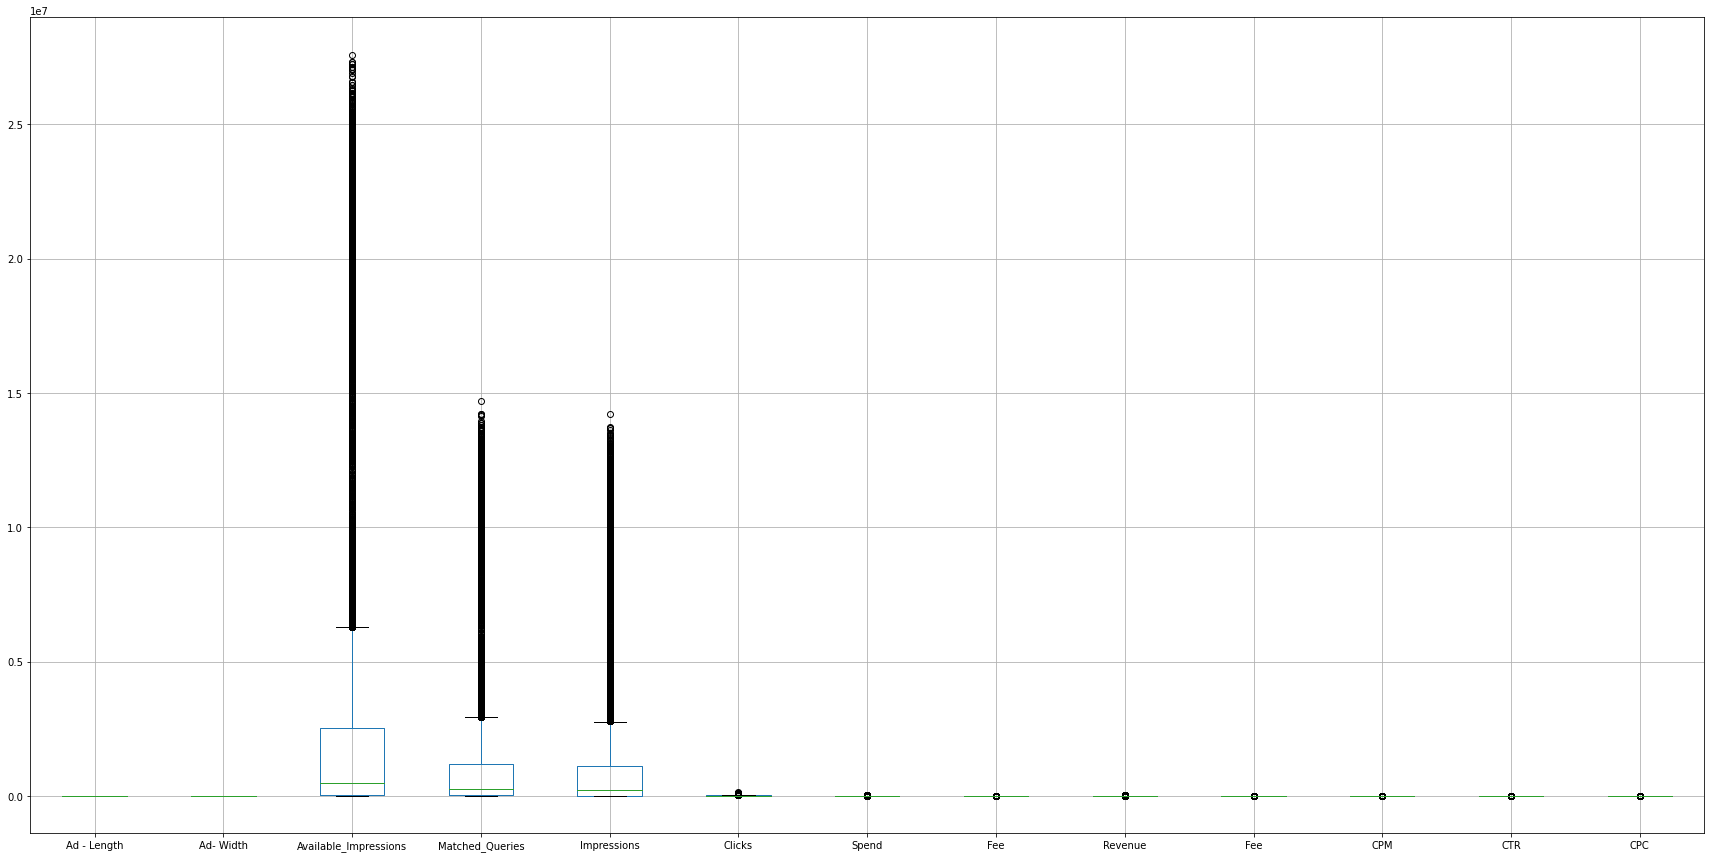

In [9]:
plt.figure(figsize=(30,15))
boxplot = data_df.boxplot(column=['Ad - Length','Ad- Width','Available_Impressions','Matched_Queries','Impressions','Clicks','Spend','Fee','Revenue','Fee', 'CPM','CTR','CPC']) 

Conclusion:
Yes, All columns have outliers except Ad - Length and Ad -Width

### 4.  Do you think treating outliers is necessary for K-Means clustering? Based on your judgement decide whether to treat outliers and if yes, which method to employ. (As an analyst your judgement may be different from another analyst).

Yes, It is necessary to treat outliers for k-means clustering

In [10]:
#Define a function which returns the Upper and Lower limit to detect outliers for each feature
def remove_outlier(col):
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range   

In [11]:
#Cap & floor the values beyond the outlier boundaries
for i in data_df:
    ll, ul = remove_outlier(data_df[i])
    data_df[i] = np.where(data_df[i] > ul, ul, data_df[i])
    data_df[i] = np.where(data_df[i] < ll, ll, data_df[i])

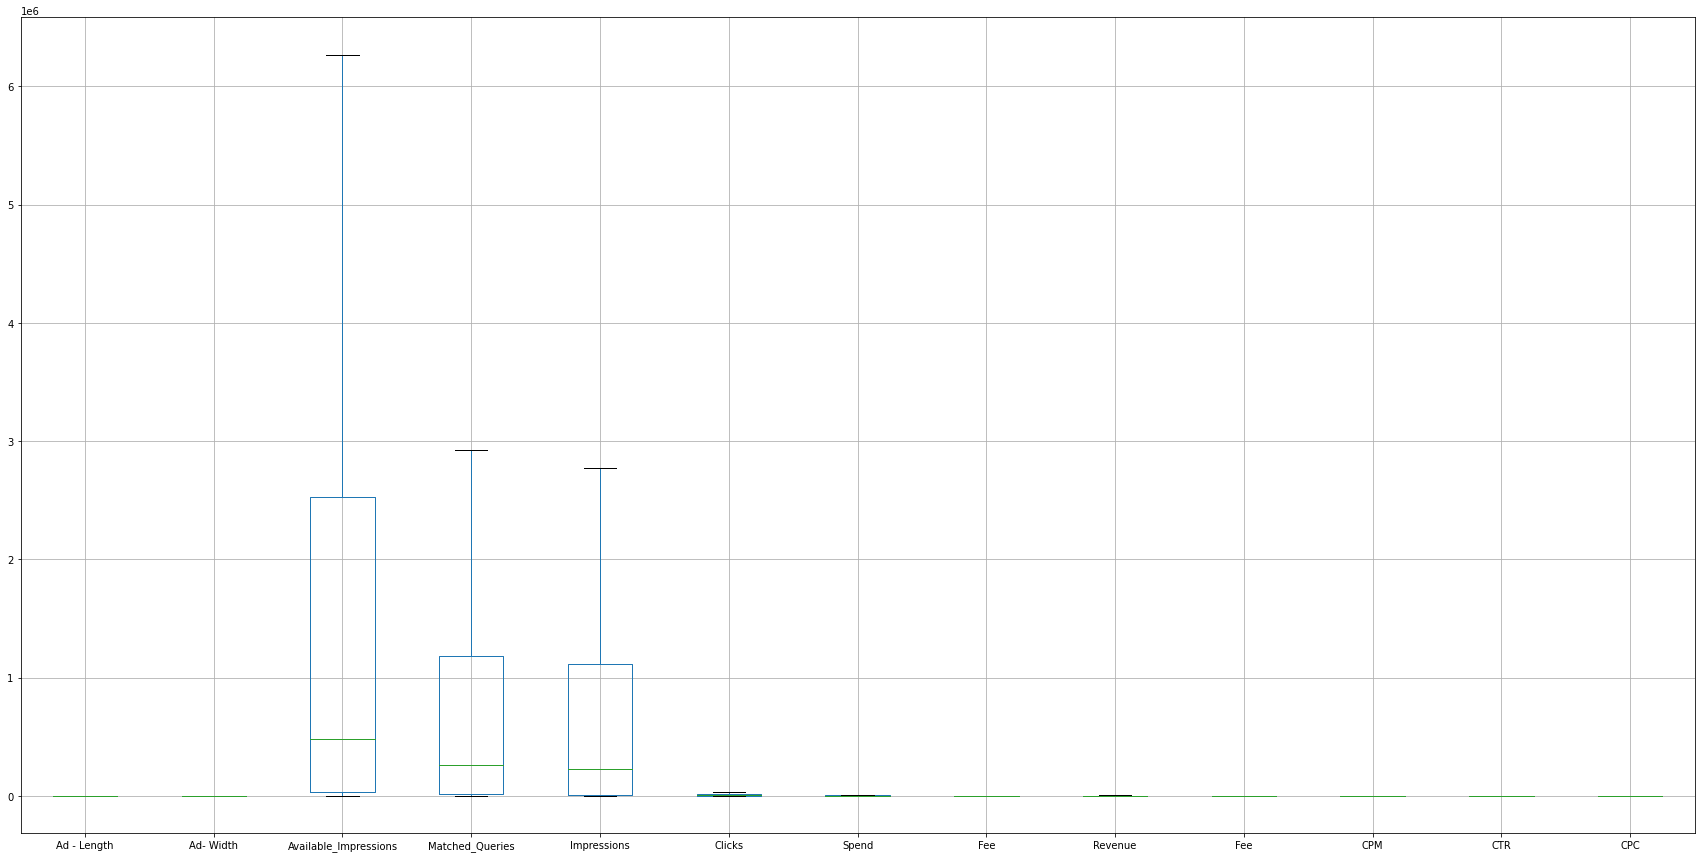

In [12]:
plt.figure(figsize=(30,15))
boxplot = data_df.boxplot(column=['Ad - Length','Ad- Width','Available_Impressions','Matched_Queries','Impressions','Clicks','Spend','Fee','Revenue','Fee', 'CPM','CTR','CPC']) 

### 5. Perform z-score scaling and discuss how it affects the speed of the algorithm.

In [42]:
data_df['CTR'].value_counts()

1.231002    585
0.000000     97
0.040000     67
0.050000     52
0.070000     48
           ... 
0.738295      1
0.093320      1
0.091189      1
0.110855      1
0.250000      1
Name: CTR, Length: 21445, dtype: int64

In [15]:
from scipy.stats import zscore
data_df_scaled = data_df.apply(zscore)

In [40]:
data_df_scaled.head()

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,-0.364496,-0.432797,-0.102518,-0.755333,-0.778949,-0.768478,-0.867488,-0.89317,0.535724,-0.880093,-1.042561,-1.042561,-1.042561
1,-0.364496,-0.432797,-0.102518,-0.755345,-0.778988,-0.768516,-0.867488,-0.89317,0.535724,-0.880093,-1.042561,-1.042561,-1.042561
2,-0.364496,-0.432797,-0.102518,-0.754900,-0.778919,-0.768445,-0.867488,-0.89317,0.535724,-0.880093,-1.042561,-1.042561,-1.042561
3,-0.364496,-0.432797,-0.102518,-0.755040,-0.778781,-0.768302,-0.867488,-0.89317,0.535724,-0.880093,-1.042561,-1.042561,-1.042561
4,-0.364496,-0.432797,-0.102518,-0.755610,-0.779030,-0.768560,-0.867488,-0.89317,0.535724,-0.880093,-1.042561,-1.042561,-1.042561


### 6. Perform clustering and do the following:

#### Perform Hierarchical by constructing a Dendrogram using WARD and Euclidean distance.


In [43]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [44]:
wardlink=linkage(data_df, method='ward')

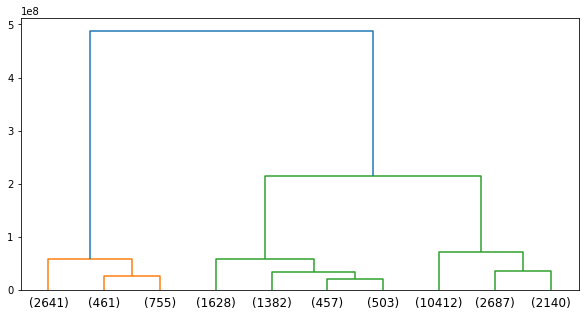

In [45]:
plt.figure(figsize=(10,5))
dend=dendrogram(wardlink, truncate_mode='lastp', p=10)

In [46]:
from scipy.cluster.hierarchy import fcluster

In [47]:
cluster=fcluster(wardlink, 23, criterion='distance')

In [48]:
cluster

array([11744, 11739, 11754, ...,  9762, 11920,  9762], dtype=int32)

#### Make Elbow plot (up to n=10) and identify optimum number of clusters for k-means algorithm.


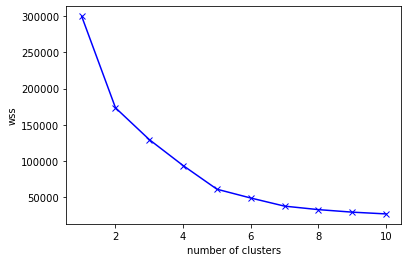

In [49]:
wss={}
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,random_state=1).fit(data_df_scaled)
    wss[k]=kmeans.inertia_
    
plt.plot(list(wss.keys()),list(wss.values()),'bx-')
plt.xlabel('number of clusters')
plt.ylabel('wss')
plt.show()

As per the checkWhen we move from K=1 to K=2, We see that there is a significant drop in the value.Also when we move from k=2 to k-3, k=3 to k=4, k=4 to k=5 there is a significant drop aswell.k=5 to k=6, the drop in values reduces significantly.Hence In this case, the WSS is not significantly dropping beyond 5, so 5 is optimal numberof clusters.

#### Print silhouette scores for up to 10 clusters and identify optimum number of clusters.

In [110]:
data_df

,Ad - Length,Ad- Width,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue
0,300,250,1806,325,323,1,0.00,0.35,0.0000
1,300,250,1780,285,285,1,0.00,0.35,0.0000
2,300,250,2727,356,355,1,0.00,0.35,0.0000
3,300,250,2430,497,495,1,0.00,0.35,0.0000
4,300,250,1218,242,242,1,0.00,0.35,0.0000
...,...,...,...,...,...,...,...,...,...
23061,720,300,1,1,1,1,0.07,0.35,0.0455
23062,720,300,3,2,2,1,0.04,0.35,0.0260
23063,720,300,2,1,1,1,0.05,0.35,0.0325
23064,120,600,7,1,1,1,0.07,0.35,0.0455


In [16]:
k_means=KMeans(n_clusters=3)
k_means.fit(data_df_scaled)
labels=k_means.labels_

In [17]:
k_means.inertia_

129592.96816922541

In [18]:
from sklearn.metrics import silhouette_score

In [19]:
labels=k_means.labels_

In [76]:
silhouette_score(data_df_scaled,labels)

0.5987172762672212

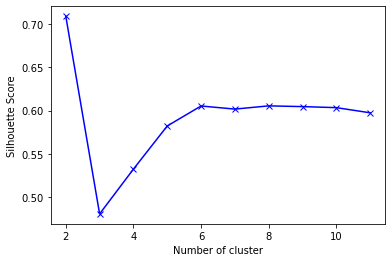

In [77]:
#Empty dictionary to store the Silhouette score for each value of k
sc = {} 

# iterate for a range of Ks and fit the scaled data to the algorithm. Store the Silhouette score for that k 
for k in range(2, 12):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(data_df_new_scaled)
    labels = kmeans.predict(data_df_scaled)
    sc[k] = silhouette_score(data_df_scaled, labels)

#Elbow plot
plt.figure()
plt.plot(list(sc.keys()), list(sc.values()), 'bx-')
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Score")
plt.show()

I have calculated Silhouette Score for scaled data using the silhouette_score() function.The Silhouette Score is a measure of how similar an object is to its own cluster compared to otherclusters, and it ranges from -1 to 1, with higher values indicating better clustering.As per Elbow plot/scree-plot, we concluded that the optimal number of clusters should be 5.Because 2 would be very less number of clusters.


#### Profile the ads based on optimum number of clusters using silhouette score and your domain understanding
#### [Hint: Group the data by clusters and take sum or mean to identify trends in clicks, spend, revenue, CPM, CTR, & CPC based on Device Type. Make bar plots.]

In [20]:
data_df['Clus_kmeans'] = labels

In [127]:
data_df.head()

,Ad - Length,Ad- Width,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,Clus_kmeans
0,300,250,1806,325,323,1,0.0,0.35,0.0,0.0031,0.0,0.0,2
1,300,250,1780,285,285,1,0.0,0.35,0.0,0.0035,0.0,0.0,2
2,300,250,2727,356,355,1,0.0,0.35,0.0,0.0028,0.0,0.0,2
3,300,250,2430,497,495,1,0.0,0.35,0.0,0.0020,0.0,0.0,2
4,300,250,1218,242,242,1,0.0,0.35,0.0,0.0041,0.0,0.0,2


In [22]:
data_df.Clus_kmeans.unique()

array([0, 1, 2])

In [128]:
data_df.describe()

,Ad - Length,Ad- Width,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,Clus_kmeans
count,23066.000000,23066.000000,2.306600e+04,2.306600e+04,2.306600e+04,23066.000000,23066.000000,23066.000000,23066.000000,18330.000000,18330.000000,18330.000000,23066.000000
mean,385.163097,337.896037,2.432044e+06,1.295099e+06,1.241520e+06,10678.518816,2706.625689,0.335123,1924.252331,0.073661,7.672045,0.351061,1.543614
std,233.651434,203.092885,4.742888e+06,2.512970e+06,2.429400e+06,17353.409363,4067.927273,0.031963,3105.238410,0.075160,6.481391,0.343334,0.605224
min,120.000000,70.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,0.000000,0.210000,0.000000,0.000100,0.000000,0.000000,0.000000
25%,120.000000,250.000000,3.367225e+04,1.828250e+04,7.990500e+03,710.000000,85.180000,0.330000,55.365375,0.002600,1.710000,0.090000,1.000000
50%,300.000000,300.000000,4.837710e+05,2.580875e+05,2.252900e+05,4425.000000,1425.125000,0.350000,926.335000,0.082550,7.660000,0.160000,2.000000
75%,720.000000,600.000000,2.527712e+06,1.180700e+06,1.112428e+06,12793.750000,3121.400000,0.350000,2091.338150,0.130000,12.510000,0.570000,2.000000
max,728.000000,600.000000,2.759286e+07,1.470202e+07,1.419477e+07,143049.000000,26931.870000,0.350000,21276.180000,1.000000,81.560000,7.260000,2.000000


In [129]:
pivot=data_df.pivot_table(index=['Clus_kmeans'],values=['Clicks','Spend','Revenue'], aggfunc='sum')
print(pivot)
pivot1=data_df.pivot_table(index=['Clus_kmeans'],values=['Clicks','Spend','Revenue'], aggfunc='sum')
print(pivot1)

                Clicks       Revenue        Spend
Clus_kmeans                                      
0             25419976  1.697451e+07  22121128.17
1            108939930  8.592699e+06  12150855.39
2            111950809  1.881760e+07  28159044.58
                Clicks       Revenue        Spend
Clus_kmeans                                      
0             25419976  1.697451e+07  22121128.17
1            108939930  8.592699e+06  12150855.39
2            111950809  1.881760e+07  28159044.58


In [130]:
pivot2=data_df.pivot_table(index=['Clus_kmeans'],values=['Clicks','Spend','Revenue'], aggfunc='mean')
print(pivot2)
pivot3=data_df.pivot_table(index=['Clus_kmeans'],values=['Clicks','Spend','Revenue'], aggfunc='mean')
print(pivot3)

                   Clicks       Revenue         Spend
Clus_kmeans                                          
0            18650.019076  12453.784744  16229.734534
1            13964.867325   1101.486818   1557.602280
2             8052.856352   1353.589195   2025.539101
                   Clicks       Revenue         Spend
Clus_kmeans                                          
0            18650.019076  12453.784744  16229.734534
1            13964.867325   1101.486818   1557.602280
2             8052.856352   1353.589195   2025.539101


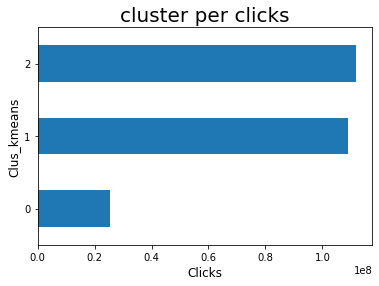

In [131]:
data_df.groupby('Clus_kmeans')['Clicks'].sum().sort_values().plot.barh();
plt.xlabel('Clicks', fontsize = 12)
plt.ylabel('Clus_kmeans', fontsize = 12)
plt.xticks(fontsize = 10)
plt.title('cluster per clicks', fontsize = 20)
plt.show()

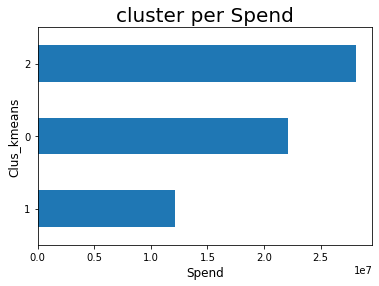

In [132]:
data_df.groupby('Clus_kmeans')['Spend'].sum().sort_values().plot.barh();
plt.xlabel('Spend', fontsize = 12)
plt.ylabel('Clus_kmeans', fontsize = 12)
plt.xticks(fontsize = 10)
plt.title('cluster per Spend', fontsize = 20)
plt.show()

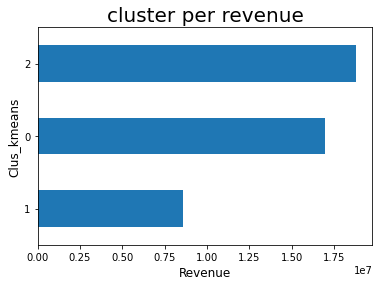

In [133]:
data_df.groupby('Clus_kmeans')['Revenue'].sum().sort_values().plot.barh();
plt.xlabel('Revenue', fontsize = 12)
plt.ylabel('Clus_kmeans', fontsize = 12)
plt.xticks(fontsize = 10)
plt.title('cluster per revenue', fontsize = 20)
plt.show()

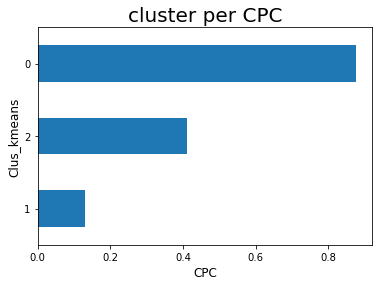

In [137]:
data_df.groupby('Clus_kmeans')['CPC'].mean().sort_values().plot.barh();
plt.xlabel('CPC', fontsize = 12)
plt.ylabel('Clus_kmeans', fontsize = 12)
plt.xticks(fontsize = 10)
plt.title('cluster per CPC', fontsize = 20)
plt.show()

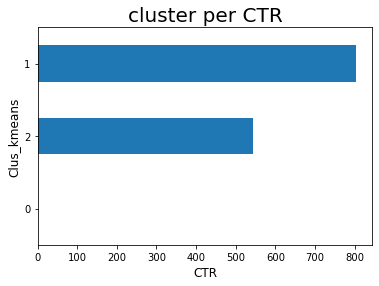

In [135]:
data_df.groupby('Clus_kmeans')['CTR'].sum().sort_values().plot.barh();
plt.xlabel('CTR', fontsize = 12)
plt.ylabel('Clus_kmeans', fontsize = 12)
plt.xticks(fontsize = 10)
plt.title('cluster per CTR', fontsize = 20)
plt.show()

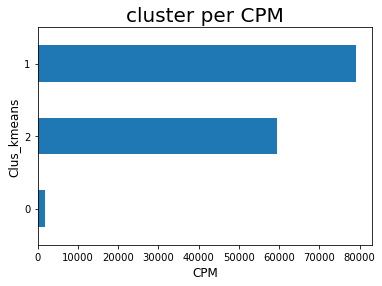

In [136]:
data_df.groupby('Clus_kmeans')['CPM'].sum().sort_values().plot.barh();
plt.xlabel('CPM', fontsize = 12)
plt.ylabel('Clus_kmeans', fontsize = 12)
plt.xticks(fontsize = 10)
plt.title('cluster per CPM', fontsize = 20)
plt.show()

In [140]:
data_df.Clus_kmeans.value_counts().sort_index()

0     1363
1     7801
2    13902
Name: Clus_kmeans, dtype: int64

In [144]:
clus_profile=data_df.groupby('Clus_kmeans').sum()
clus_profile['group_mean']=data_df.Clus_kmeans.value_counts().sort_index()
clus_profile

,Ad - Length,Ad- Width,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,group_mean
Clus_kmeans,,,,,,,,,,,,,
0,931384,159590,26004712361,13821594161,13311010176,25419976,22121128.17,320.77,1.697451e+07,2.2192,1941.10,1019.02,1363
1,1051104,4675700,2165950543,1366434656,1186082806,108939930,12150855.39,2639.24,8.592699e+06,804.7279,79204.66,763.56,7801
2,6901684,2958620,27926856293,14684728021,14139796240,111950809,28159044.58,4769.94,1.881760e+07,543.2506,59482.83,4652.36,13902


# Problem 2:
### PCA 
FH (FT): Primary census abstract for female headed households excluding institutional households (India & States/UTs - District Level), Scheduled tribes - 2011 PCA for Female Headed Household Excluding Institutional Household. The Indian Census has the reputation of being one of the best in the world. The first Census in India was conducted in the year 1872. This was conducted at different points of time in different parts of the country. In 1881 a Census was taken for the entire country simultaneously. Since then, Census has been conducted every ten years, without a break. Thus, the Census of India 2011 was the fifteenth in this unbroken series since 1872, the seventh after independence and the second census of the third millennium and twenty first century. The census has been uninterruptedly continued despite of several adversities like wars, epidemics, natural calamities, political unrest, etc. The Census of India is conducted under the provisions of the Census Act 1948 and the Census Rules, 1990. The Primary Census Abstract which is important publication of 2011 Census gives basic information on Area, Total Number of Households, Total Population, Scheduled Castes, Scheduled Tribes Population, Population in the age group 0-6, Literates, Main Workers and Marginal Workers classified by the four broad industrial categories, namely, (i) Cultivators, (ii) Agricultural Laborers, (iii) Household Industry Workers, and (iv) Other Workers and also Non-Workers. The characteristics of the Total Population include Scheduled Castes, Scheduled Tribes, Institutional and Houseless Population and are presented by sex and rural-urban residence. Census 2011 covered 35 States/Union Territories, 640 districts, 5,924 sub-districts, 7,935 Towns and 6,40,867 Villages.
The data collected has so many variables thus making it difficult to find useful details without using Data Science Techniques. You are tasked to perform detailed EDA and identify Optimum Principal Components that explains the most variance in data. Use Sklearn only.

#### 1. PCA: Read the data and perform basic checks like checking head, info, summary, nulls, and duplicates, etc.

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
%matplotlib inline

In [30]:
df=pd.read_excel('PCA India Data_Census.xlsx')

In [4]:
df.head()

,State Code,Dist.Code,State,Area Name,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,1,1,Jammu & Kashmir,Kupwara,7707,23388,29796,5862,6196,3,...,1150,749,180,237,680,252,32,46,258,214
1,1,2,Jammu & Kashmir,Badgam,6218,19585,23102,4482,3733,7,...,525,715,123,229,186,148,76,178,140,160
2,1,3,Jammu & Kashmir,Leh(Ladakh),4452,6546,10964,1082,1018,3,...,114,188,44,89,3,34,0,4,67,61
3,1,4,Jammu & Kashmir,Kargil,1320,2784,4206,563,677,0,...,194,247,61,128,13,50,4,10,116,59
4,1,5,Jammu & Kashmir,Punch,11654,20591,29981,5157,4587,20,...,874,1928,465,1043,205,302,24,105,180,478


In [5]:
df.tail()

,State Code,Dist.Code,State,Area Name,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
635,34,636,Puducherry,Mahe,3333,8154,11781,1146,1203,21,...,32,47,0,0,0,0,0,0,32,47
636,34,637,Puducherry,Karaikal,10612,12346,21691,1544,1533,2234,...,155,337,3,14,38,130,4,23,110,170
637,35,638,Andaman & Nicobar Island,Nicobars,1275,1549,2630,227,225,0,...,104,134,9,4,2,6,17,47,76,77
638,35,639,Andaman & Nicobar Island,North & Middle Andaman,3762,5200,8012,723,664,0,...,136,172,24,44,11,21,1,4,100,103
639,35,640,Andaman & Nicobar Island,South Andaman,7975,11977,18049,1470,1358,0,...,173,122,6,2,17,17,2,4,148,99


In [24]:
print("There are {} number of rows and {} number of columns in the data.".format(df.shape[0],df.shape[1]))

There are 640 number of rows and 61 number of columns in the data.


In [ ]:
df.info()

In [7]:
df.isnull().sum()

State Code       0
Dist.Code        0
State            0
Area Name        0
No_HH            0
                ..
MARG_HH_0_3_F    0
MARG_OT_0_3_M    0
MARG_OT_0_3_F    0
NON_WORK_M       0
NON_WORK_F       0
Length: 61, dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
State Code,640.0,17.114062,9.426486,1.0,9.00,18.0,24.00,35.0
Dist.Code,640.0,320.500000,184.896367,1.0,160.75,320.5,480.25,640.0
No_HH,640.0,51222.871875,48135.405475,350.0,19484.00,35837.0,68892.00,310450.0
TOT_M,640.0,79940.576563,73384.511114,391.0,30228.00,58339.0,107918.50,485417.0
TOT_F,640.0,122372.084375,113600.717282,698.0,46517.75,87724.5,164251.75,750392.0
M_06,640.0,12309.098438,11500.906881,56.0,4733.75,9159.0,16520.25,96223.0
F_06,640.0,11942.300000,11326.294567,56.0,4672.25,8663.0,15902.25,95129.0
M_SC,640.0,13820.946875,14426.373130,0.0,3466.25,9591.5,19429.75,103307.0
F_SC,640.0,20778.392188,21727.887713,0.0,5603.25,13709.0,29180.00,156429.0
M_ST,640.0,6191.807813,9912.668948,0.0,293.75,2333.5,7658.00,96785.0


In [31]:
df1=df.copy()

In [4]:
df1.head()

,State Code,Dist.Code,State,Area Name,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,1,1,Jammu & Kashmir,Kupwara,7707,23388,29796,5862,6196,3,...,1150,749,180,237,680,252,32,46,258,214
1,1,2,Jammu & Kashmir,Badgam,6218,19585,23102,4482,3733,7,...,525,715,123,229,186,148,76,178,140,160
2,1,3,Jammu & Kashmir,Leh(Ladakh),4452,6546,10964,1082,1018,3,...,114,188,44,89,3,34,0,4,67,61
3,1,4,Jammu & Kashmir,Kargil,1320,2784,4206,563,677,0,...,194,247,61,128,13,50,4,10,116,59
4,1,5,Jammu & Kashmir,Punch,11654,20591,29981,5157,4587,20,...,874,1928,465,1043,205,302,24,105,180,478


In [32]:
df_new=df1.drop(['State Code','Dist.Code','State','Area Name'],axis=1)

In [33]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 57 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   No_HH           640 non-null    int64
 1   TOT_M           640 non-null    int64
 2   TOT_F           640 non-null    int64
 3   M_06            640 non-null    int64
 4   F_06            640 non-null    int64
 5   M_SC            640 non-null    int64
 6   F_SC            640 non-null    int64
 7   M_ST            640 non-null    int64
 8   F_ST            640 non-null    int64
 9   M_LIT           640 non-null    int64
 10  F_LIT           640 non-null    int64
 11  M_ILL           640 non-null    int64
 12  F_ILL           640 non-null    int64
 13  TOT_WORK_M      640 non-null    int64
 14  TOT_WORK_F      640 non-null    int64
 15  MAINWORK_M      640 non-null    int64
 16  MAINWORK_F      640 non-null    int64
 17  MAIN_CL_M       640 non-null    int64
 18  MAIN_CL_F       640 non-null  

##### Perform detailed Exploratory analysis by creating certain questions like (i) Which state has highest gender ratio and which has the lowest? (ii) Which district has the highest & lowest gender ratio? (Example Questions). Pick 5 variables out of the given 24 variables below for EDA: No_HH, TOT_M, TOT_F, M_06, F_06, M_SC, F_SC, M_ST, F_ST, M_LIT, F_LIT, M_ILL, F_ILL, TOT_WORK_M, TOT_WORK_F, MAINWORK_M, MAINWORK_F, MAIN_CL_M, MAIN_CL_F, MAIN_AL_M, MAIN_AL_F, MAIN_HH_M, MAIN_HH_F, MAIN_OT_M, MAIN_OT_F

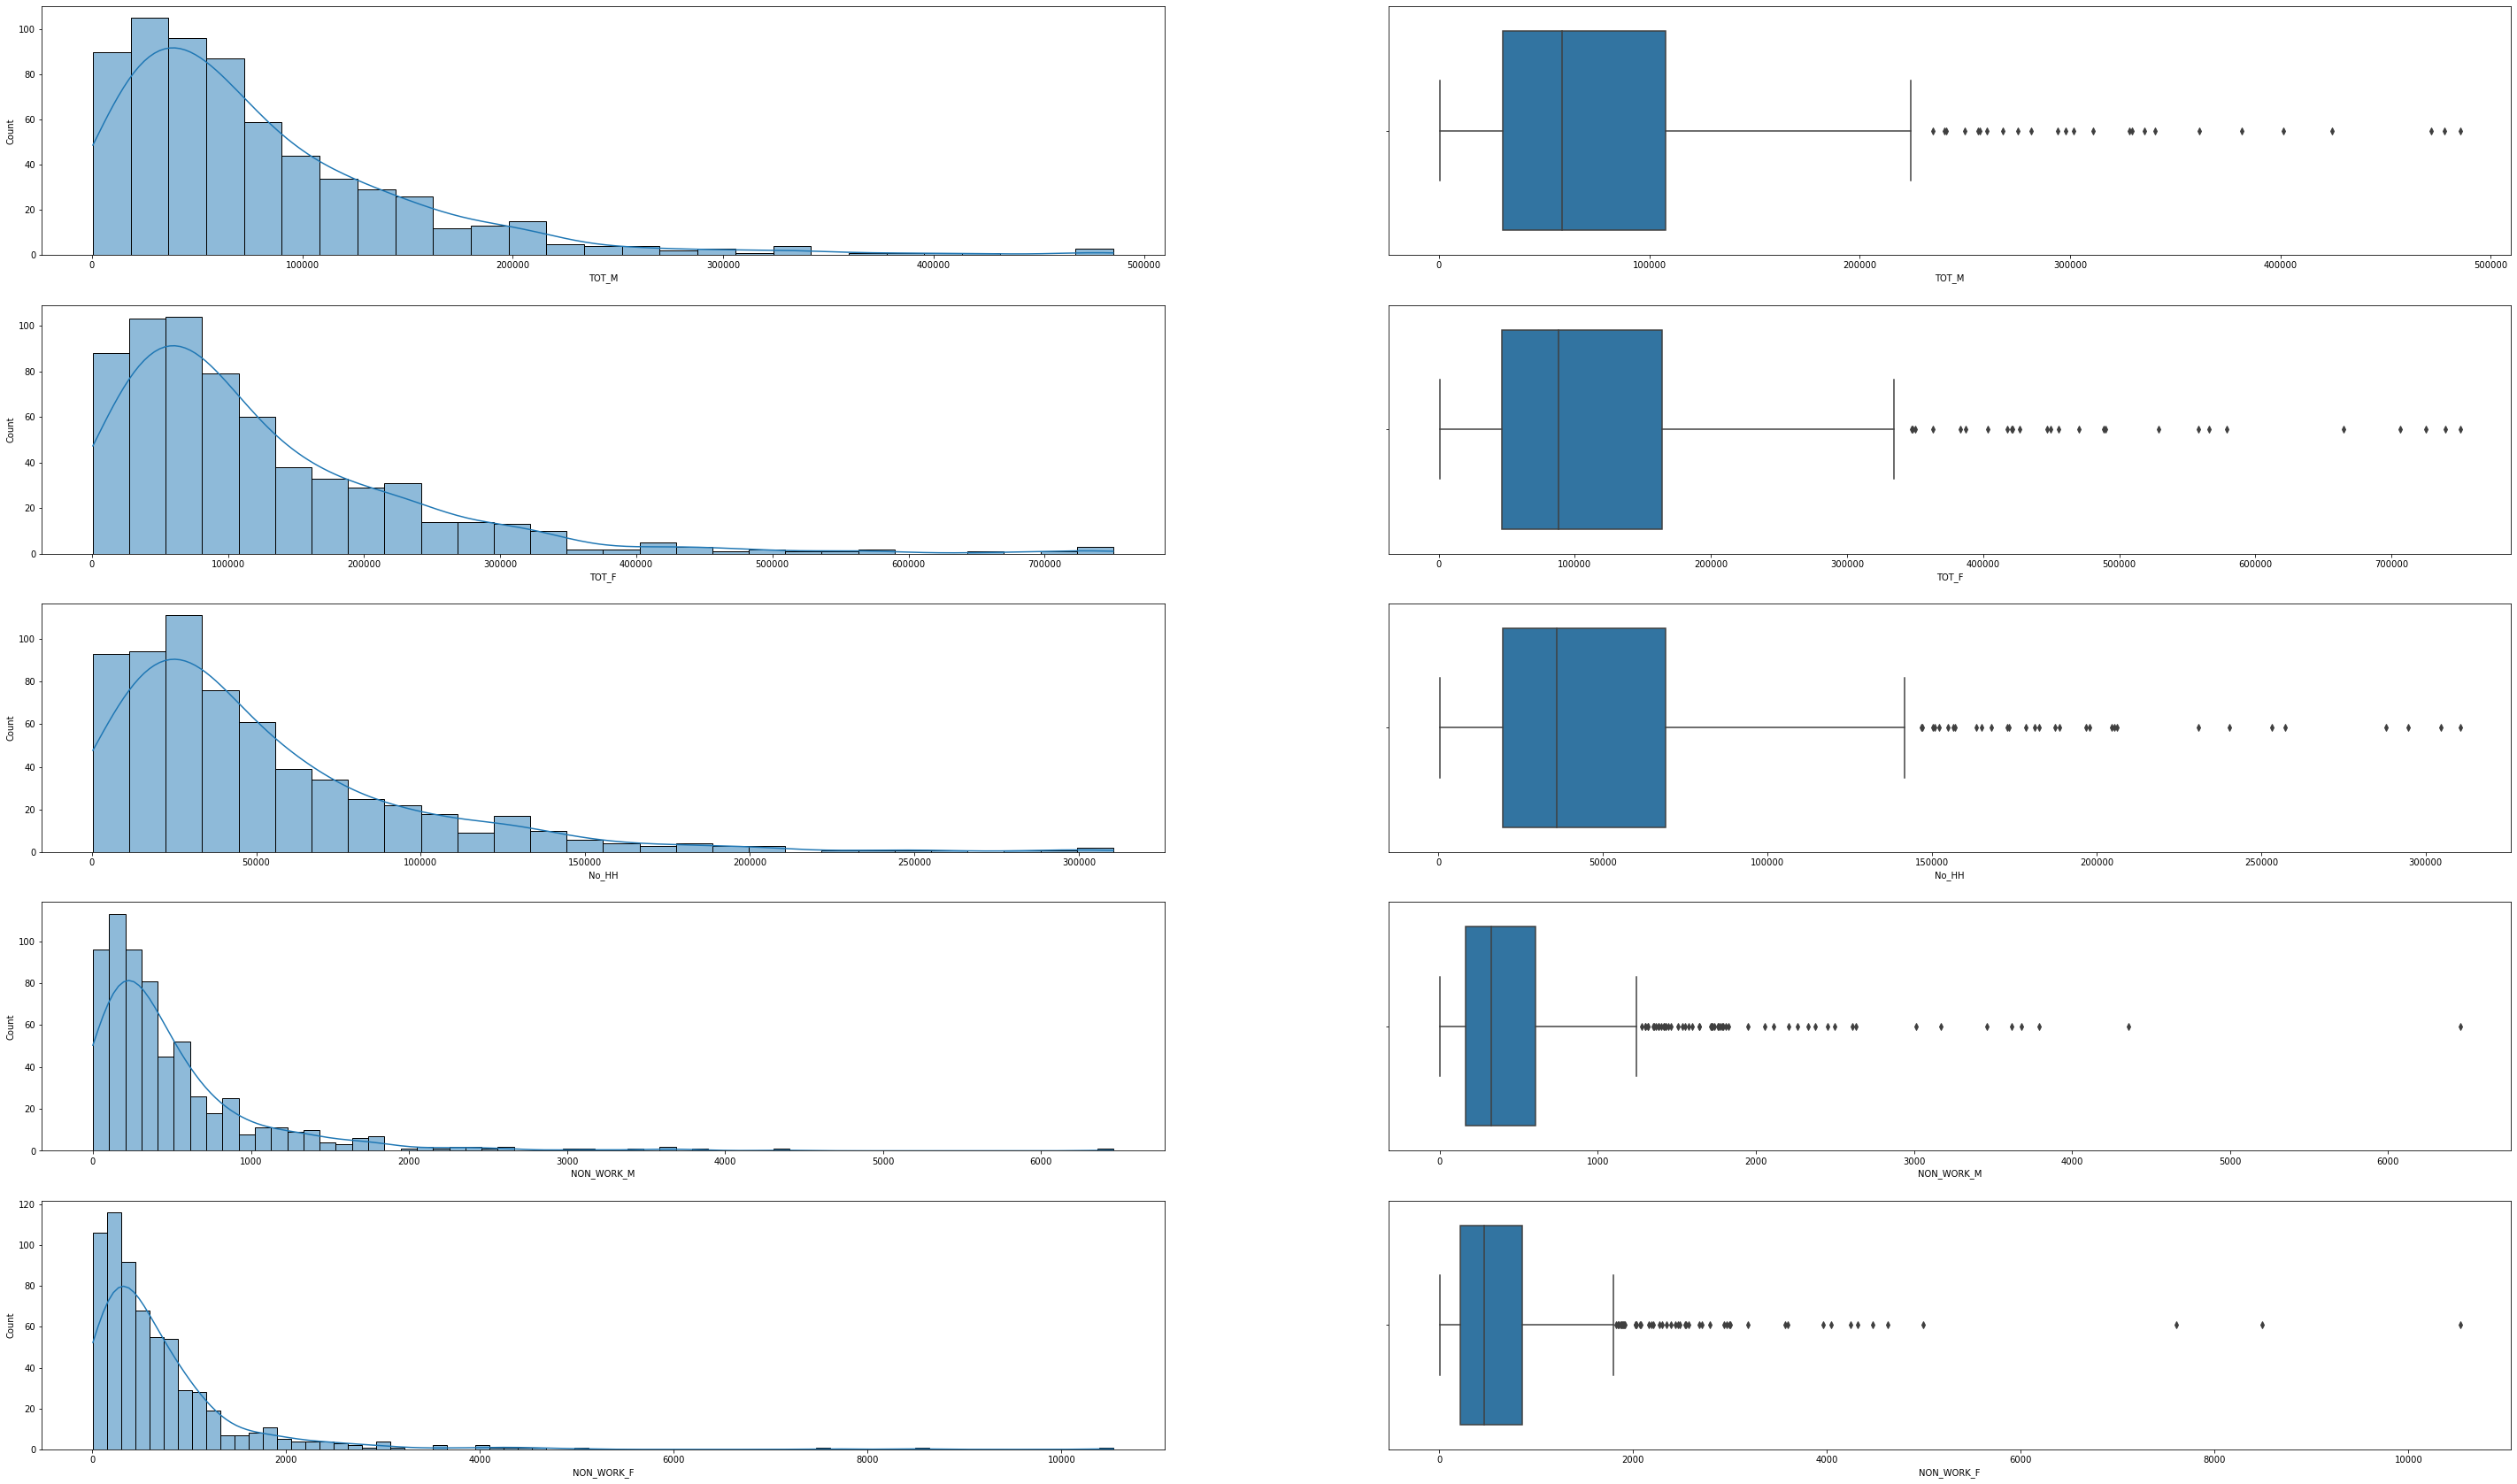

In [38]:
fig, axes = plt.subplots(nrows=5,ncols=2,figsize=(50,30))
sns.histplot(x=df['TOT_M'],kde=True, ax=axes[0][0])
sns.boxplot(x=df['TOT_M'],ax=axes[0][1])
sns.histplot(x=df['TOT_F'],kde=True, ax=axes[1][0])
sns.boxplot(x=df['TOT_F'],ax=axes[1][1])
sns.histplot(x=df['No_HH'],kde=True, ax=axes[2][0])
sns.boxplot(x=df['No_HH'],ax=axes[2][1])
sns.histplot(x=df['NON_WORK_M'],kde=True, ax=axes[3][0])
sns.boxplot(x=df['NON_WORK_M'],ax=axes[3][1])
sns.histplot(x=df['NON_WORK_F'],kde=True, ax=axes[4][0])
sns.boxplot(x=df['NON_WORK_F'],ax=axes[4][1])
plt.show()

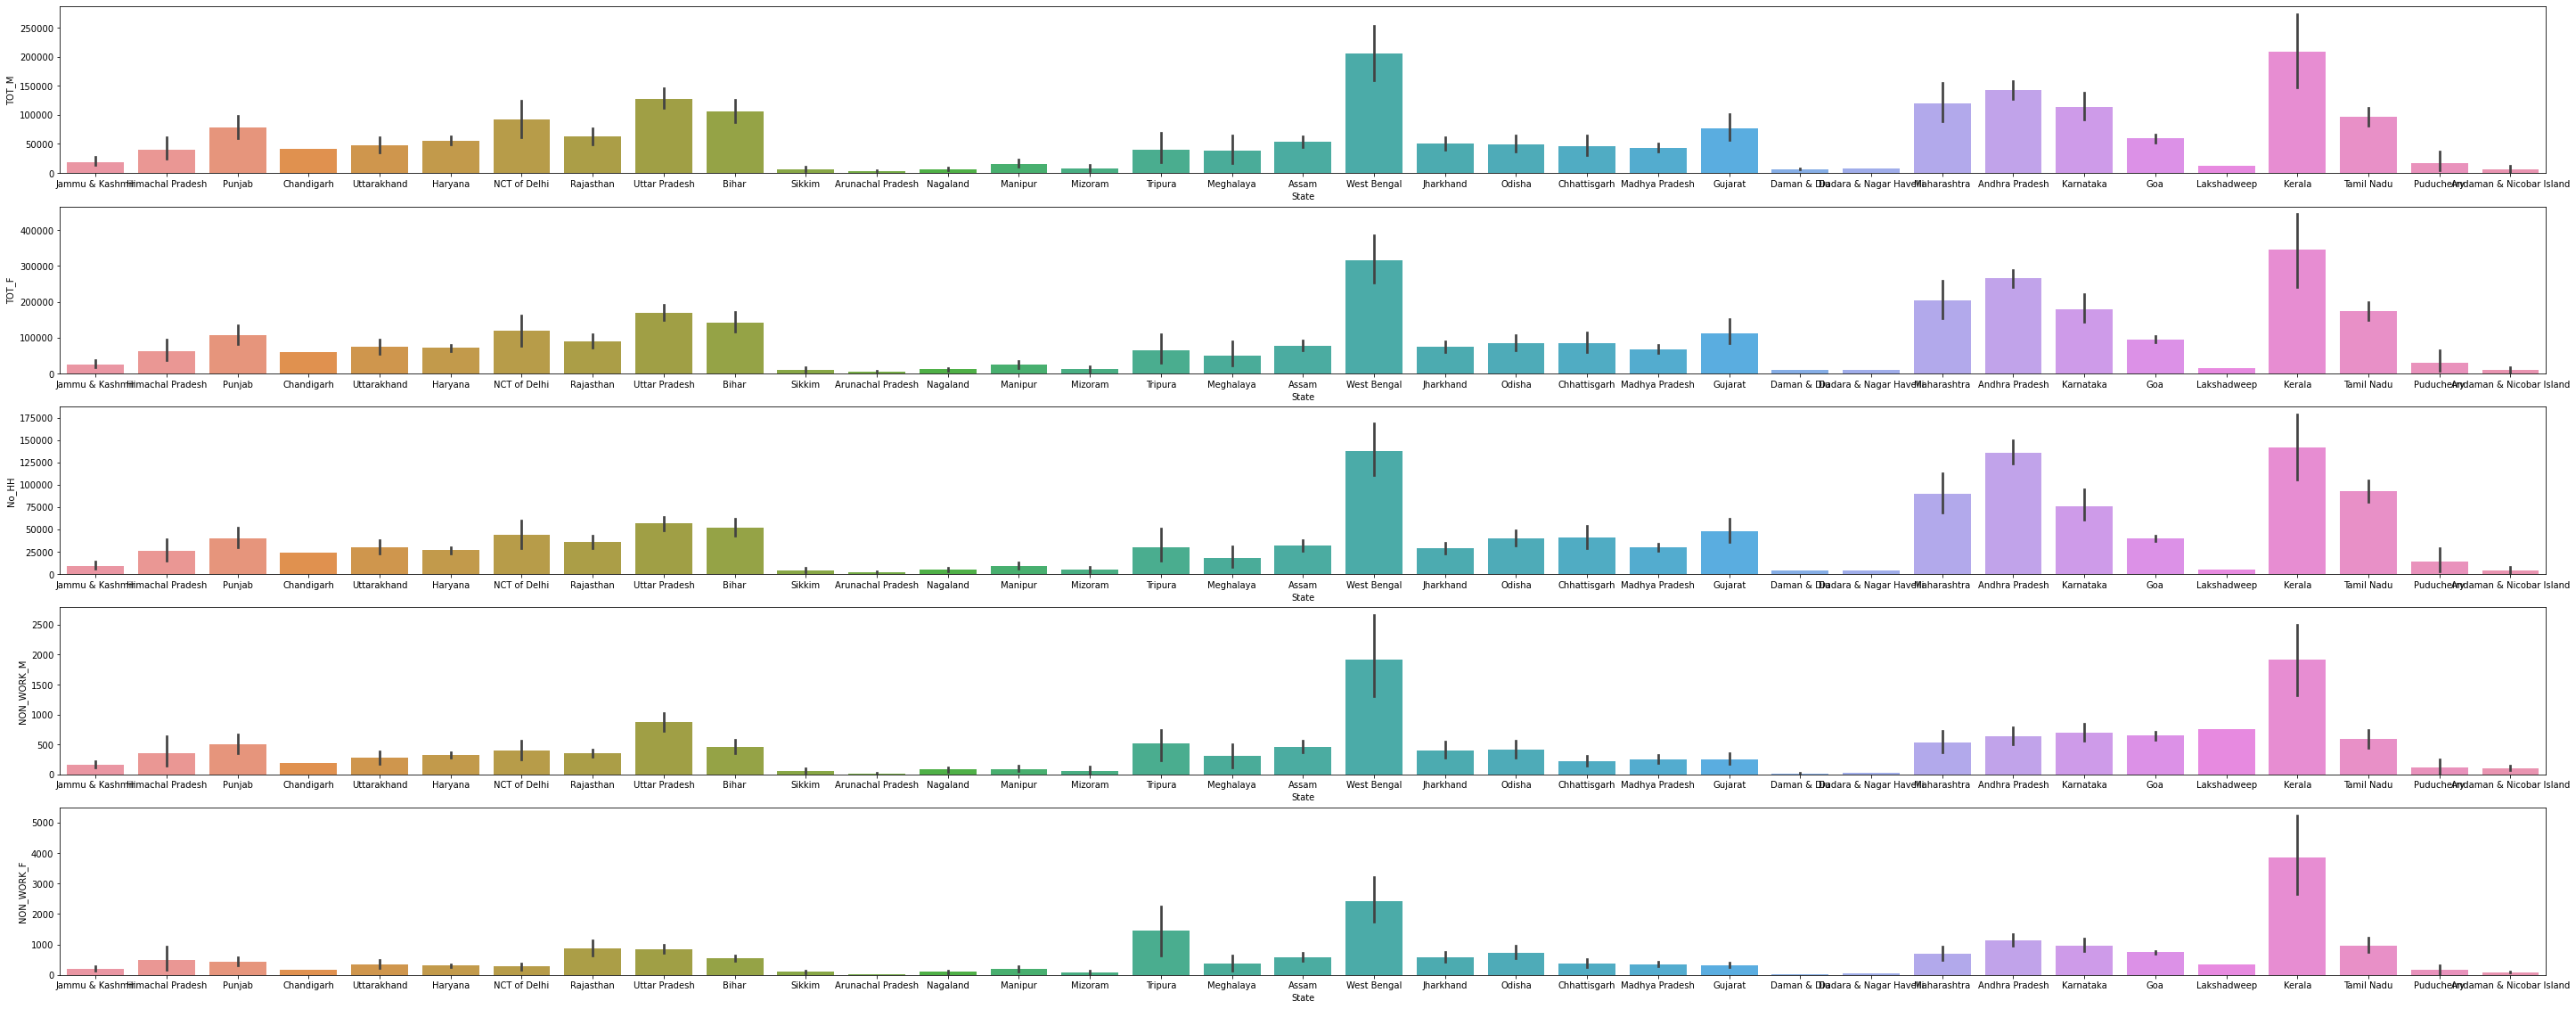

In [48]:
fig, axes = plt.subplots(5, figsize=(50,20))
sns.barplot(x=df['State'],y=df['TOT_M'],ax=axes[0])
sns.barplot(x=df['State'],y=df['TOT_F'],ax=axes[1])
sns.barplot(x=df['State'],y=df['No_HH'],ax=axes[2])
sns.barplot(x=df['State'],y=df['NON_WORK_M'],ax=axes[3])
sns.barplot(x=df['State'],y=df['NON_WORK_F'],ax=axes[4])
plt.show()

##### We choose not to treat outliers for this case. Do you think that treating outliers for this case is necessary?

Treating outliers is not necessary unless they are resulting from a processing mistakes or false measurements. We can kept the outliers in the data.

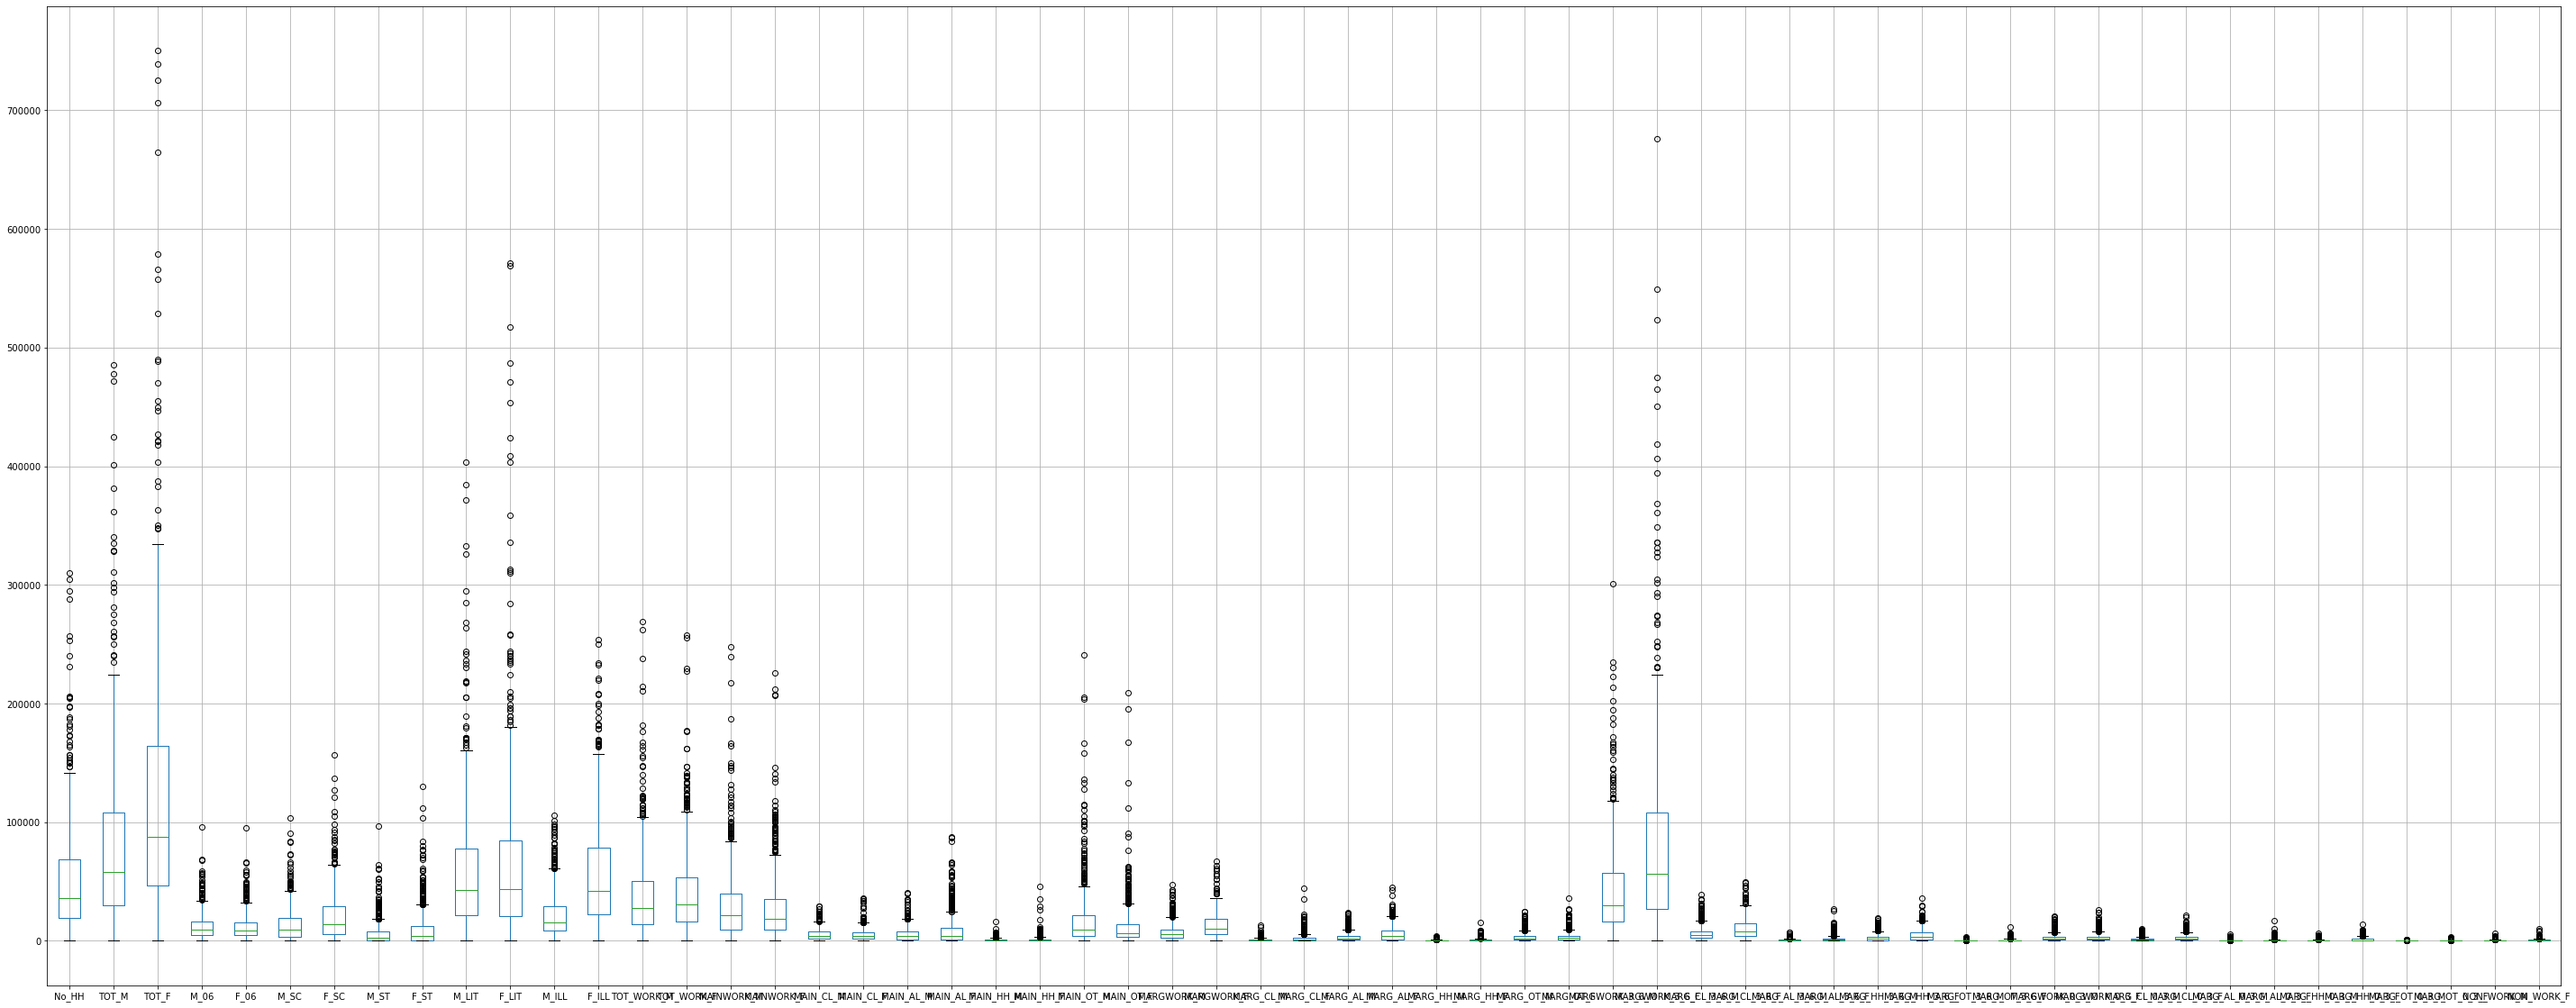

In [6]:
plt.figure(figsize=(50,20))
boxplot = df_new.boxplot() 

##### Scale the Data using z-score method. Does scaling have any impact on outliers? Compare boxplots before and after scaling and comment.

In [34]:
from scipy.stats import zscore
df_new_scaled = df_new.apply(zscore)

In [8]:
df_new_scaled.head()

,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,F_ST,M_LIT,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,-0.904738,-0.771236,-0.815563,-0.561012,-0.507738,-0.958575,-0.957049,-0.423306,-0.476423,-0.798097,...,-0.163229,-0.720610,-0.156494,-0.287524,0.156577,-0.657412,-0.365258,-0.499977,-0.413053,-0.539614
1,-0.935695,-0.823100,-0.874534,-0.681096,-0.725367,-0.958297,-0.956772,-0.582014,-0.607607,-0.849434,...,-0.583103,-0.732811,-0.282327,-0.294688,-0.491731,-0.723062,0.042855,-0.073481,-0.606455,-0.598988
2,-0.972412,-1.000919,-0.981466,-0.976956,-0.965262,-0.958575,-0.956772,-0.038951,-0.027273,-0.956457,...,-0.859212,-0.921931,-0.456727,-0.420050,-0.731894,-0.795026,-0.662068,-0.635680,-0.726103,-0.707839
3,-1.037530,-1.052224,-1.041001,-1.022118,-0.995393,-0.958783,-0.957049,-0.355965,-0.390060,-1.004643,...,-0.805468,-0.900758,-0.419198,-0.385127,-0.718770,-0.784926,-0.624966,-0.616294,-0.645791,-0.710038
4,-0.822676,-0.809381,-0.813933,-0.622359,-0.649908,-0.957395,-0.955529,0.149238,0.043330,-0.800568,...,-0.348645,-0.297513,0.472670,0.434200,-0.466796,-0.625849,-0.439461,-0.309346,-0.540895,-0.249344


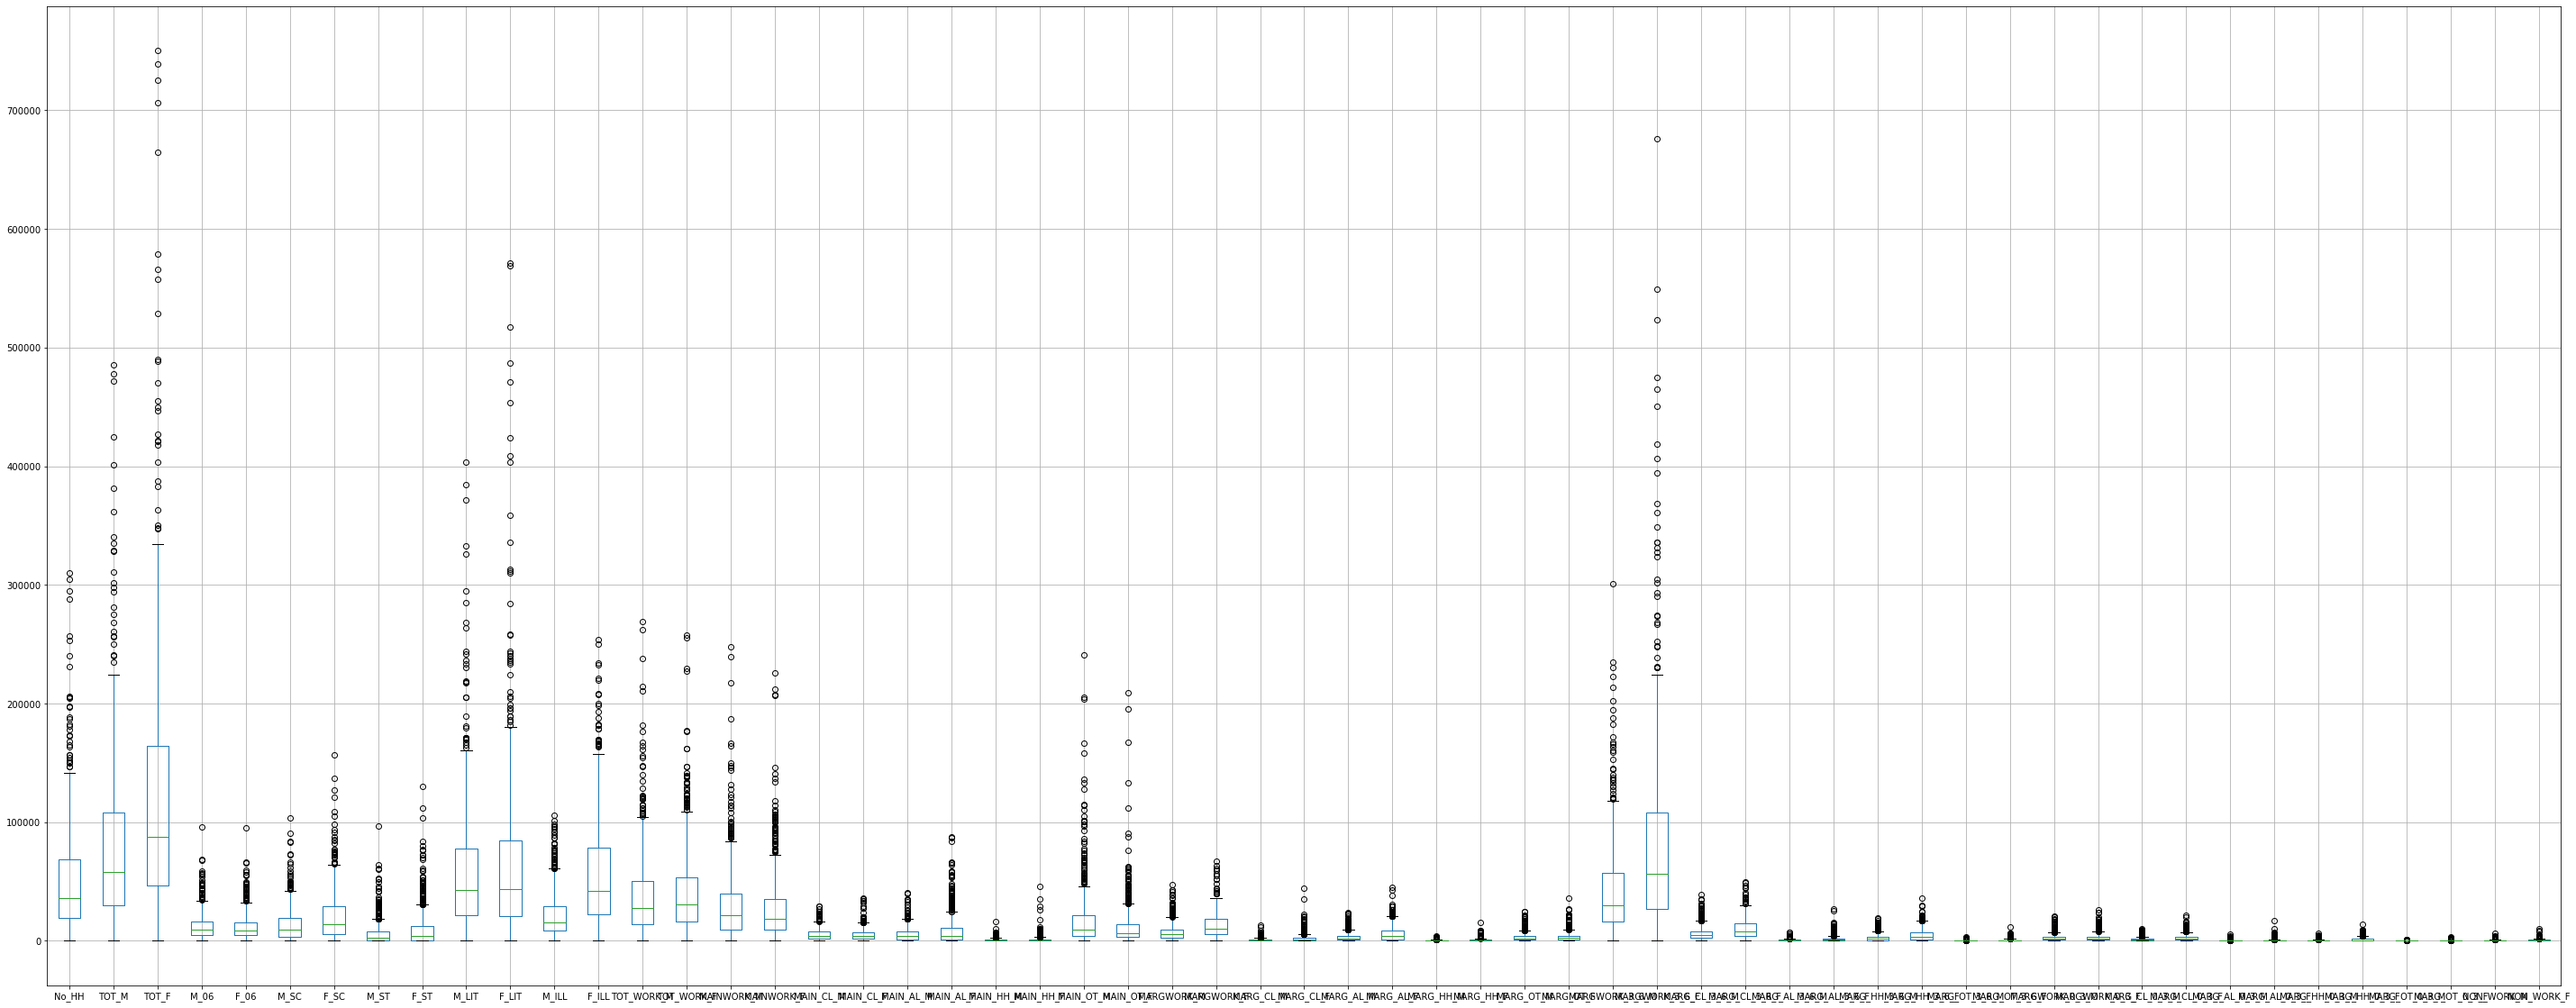

In [9]:
plt.figure(figsize=(50,20))
boxplot = df_new.boxplot() 

As we can see from both the graphs that there is not affect on ouliers before and after scaling. 

##### Perform all the required steps for PCA (use sklearn only) Create the covariance Matrix Get eigen values and eigen vector.

In [35]:
#Finding principal components for the data
pca = PCA(n_components=57, random_state=123)
df_new_pca1 = pd.DataFrame(pca.fit_transform(df_new_scaled))

#The percentage of variance explained by each principal component
exp_var = pca.explained_variance_ratio_

In [19]:
#check eigen values
exp_var

array([5.57260632e-01, 1.37844354e-01, 7.27529548e-02, 6.42641771e-02,
       3.86504944e-02, 3.39516923e-02, 2.06023855e-02, 1.31576386e-02,
       1.08085894e-02, 9.25395468e-03, 7.52911540e-03, 6.19101667e-03,
       5.18772384e-03, 4.92694855e-03, 3.36593119e-03, 2.38692984e-03,
       1.98617593e-03, 1.86206747e-03, 1.70414955e-03, 1.40317638e-03,
       1.00910494e-03, 7.77653131e-04, 6.63717190e-04, 5.19117774e-04,
       4.74341222e-04, 4.10687364e-04, 2.54183814e-04, 1.92422147e-04,
       1.63167083e-04, 1.42503342e-04, 1.38248605e-04, 8.80379297e-05,
       4.55026824e-05, 1.87057826e-05, 1.24990208e-05, 2.32283019e-32,
       1.27499248e-32, 4.34057237e-33, 4.34057237e-33, 4.34057237e-33,
       4.34057237e-33, 4.34057237e-33, 4.34057237e-33, 4.34057237e-33,
       4.34057237e-33, 4.34057237e-33, 4.34057237e-33, 4.34057237e-33,
       4.34057237e-33, 4.34057237e-33, 4.34057237e-33, 4.34057237e-33,
       4.34057237e-33, 4.34057237e-33, 4.34057237e-33, 2.85228733e-33,
      

In [18]:
#Extract eigen vectors
pca.components_

array([[ 0.15602058,  0.16711763,  0.16555318, ...,  0.13219224,
         0.15037558,  0.1310662 ],
       [-0.12634653, -0.08967655, -0.10491237, ...,  0.05081332,
        -0.06536455, -0.07384742],
       [-0.00269025,  0.05669762,  0.03874947, ..., -0.07871987,
         0.11182732,  0.1025525 ],
       ...,
       [-0.        , -0.05430063, -0.24538568, ...,  0.02013262,
        -0.0643449 , -0.01429761],
       [-0.        , -0.12712879, -0.15109232, ...,  0.09793471,
        -0.10207741,  0.05345548],
       [ 0.        , -0.24528705, -0.16113277, ..., -0.02041733,
        -0.02925772, -0.0643743 ]])

In [20]:
pca.explained_variance_ratio_

array([5.57260632e-01, 1.37844354e-01, 7.27529548e-02, 6.42641771e-02,
       3.86504944e-02, 3.39516923e-02, 2.06023855e-02, 1.31576386e-02,
       1.08085894e-02, 9.25395468e-03, 7.52911540e-03, 6.19101667e-03,
       5.18772384e-03, 4.92694855e-03, 3.36593119e-03, 2.38692984e-03,
       1.98617593e-03, 1.86206747e-03, 1.70414955e-03, 1.40317638e-03,
       1.00910494e-03, 7.77653131e-04, 6.63717190e-04, 5.19117774e-04,
       4.74341222e-04, 4.10687364e-04, 2.54183814e-04, 1.92422147e-04,
       1.63167083e-04, 1.42503342e-04, 1.38248605e-04, 8.80379297e-05,
       4.55026824e-05, 1.87057826e-05, 1.24990208e-05, 2.32283019e-32,
       1.27499248e-32, 4.34057237e-33, 4.34057237e-33, 4.34057237e-33,
       4.34057237e-33, 4.34057237e-33, 4.34057237e-33, 4.34057237e-33,
       4.34057237e-33, 4.34057237e-33, 4.34057237e-33, 4.34057237e-33,
       4.34057237e-33, 4.34057237e-33, 4.34057237e-33, 4.34057237e-33,
       4.34057237e-33, 4.34057237e-33, 4.34057237e-33, 2.85228733e-33,
      

#####  Identify the optimum number of PCs (for this project, take at least 90% explained variance). Show Scree plot.

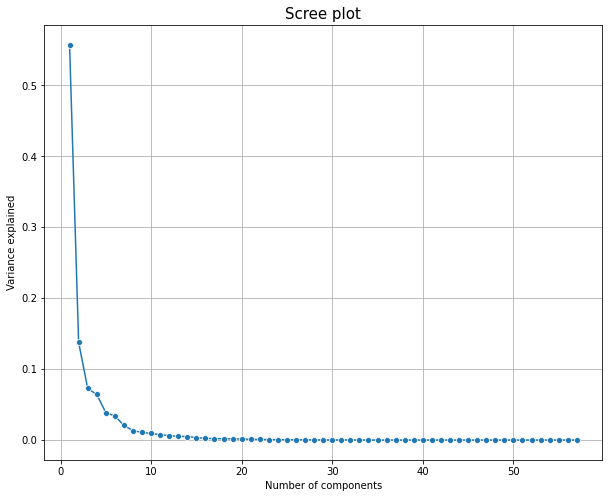

In [21]:
plt.figure(figsize=(10,8))
sns.lineplot(x=range(1,58),y=pca.explained_variance_ratio_, marker='o')
plt.title("Scree plot", fontsize=15)
plt.xlabel("Number of components",fontsize=10)
plt.ylabel("Variance explained",fontsize=10)
plt.grid()
plt.show()

In [23]:
#cumulative explained variance ratio to find a cut off for selecting the number of PCs.
np.cumsum(pca.explained_variance_ratio_)

array([0.55726063, 0.69510499, 0.76785794, 0.83212212, 0.87077261,
       0.9047243 , 0.92532669, 0.93848433, 0.94929292, 0.95854687,
       0.96607599, 0.97226701, 0.97745473, 0.98238168, 0.98574761,
       0.98813454, 0.99012071, 0.99198278, 0.99368693, 0.99509011,
       0.99609921, 0.99687687, 0.99754058, 0.9980597 , 0.99853404,
       0.99894473, 0.99919891, 0.99939134, 0.9995545 , 0.99969701,
       0.99983525, 0.99992329, 0.9999688 , 0.9999875 , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        ])

In [25]:
sum = 0
for ix, i in enumerate(exp_var):
  sum = sum + i
  if(sum>0.90):
    print("Number of PCs that explain at least 90% variance: ", ix+1)
    break

Number of PCs that explain at least 90% variance:  6


For this project, we need to consider at least 90% explained variance, so cut off for selecting the number of PCs is:'6'.

##### Compare PCs with Actual Columns and identify which is explaining most variance. Write inferences about all the Principal components in terms of actual variables.

In [42]:
pc_comps = ['PC1','PC2','PC3','PC4','PC5','PC6']
df_pca = pd.DataFrame(np.round(pca.components_[6,:],2),index=pc_comps,columns=df_new_scaled.columns)
df_pca.T.iloc[6,9]

ValueError: Shape of passed values is (57, 1), indices imply (6, 57)

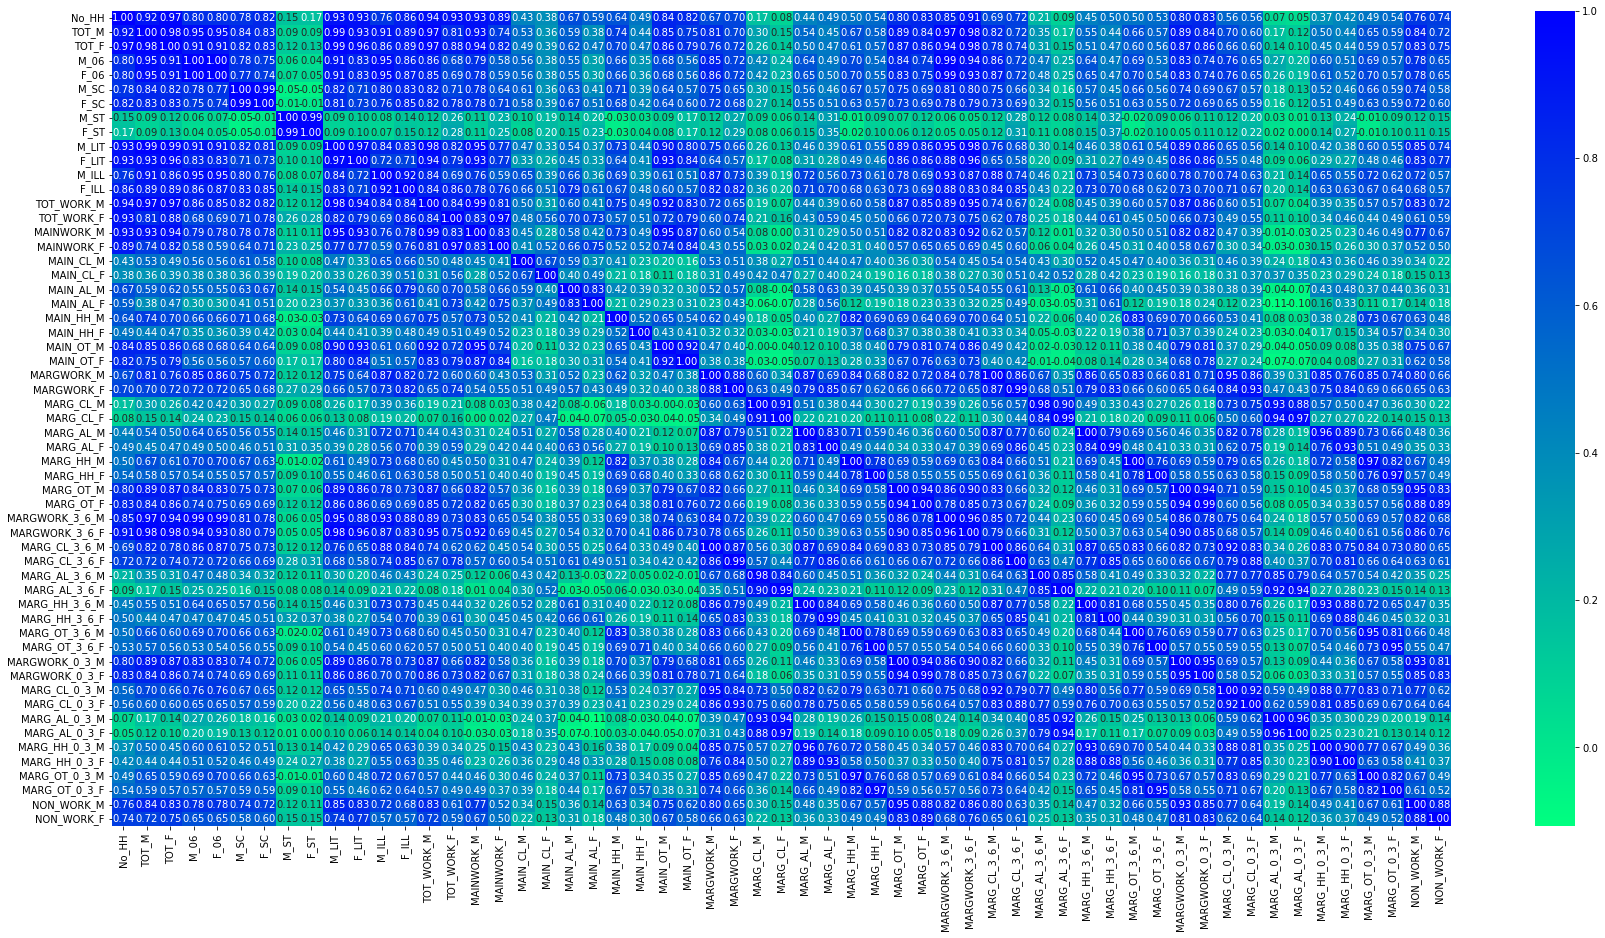

In [40]:
plt.figure(figsize=(30,15))
sns.heatmap(df_new.corr(),annot=True,fmt='.2f',cmap='winter_r')
plt.show()

#####  PCA: Write linear equation for first PC.

In [31]:
def color_high(val):
    if val <= -0.16: # you can decide any value as per your understanding
        return 'background: pink'
    elif val >= 0.16:
        return 'background: skyblue'   
    
df_pca.T.style.applymap(color_high)

,PC1,PC2,PC3,PC4,PC5,PC6
No_HH,0.160000,-0.130000,-0.000000,-0.130000,-0.010000,0.000000
TOT_M,0.170000,-0.090000,0.060000,-0.020000,-0.030000,-0.070000
TOT_F,0.170000,-0.100000,0.040000,-0.070000,-0.010000,-0.040000
M_06,0.160000,-0.020000,0.060000,0.010000,-0.050000,-0.160000
F_06,0.160000,-0.020000,0.050000,0.010000,-0.040000,-0.150000
M_SC,0.150000,-0.050000,0.000000,0.010000,-0.170000,-0.060000
F_SC,0.150000,-0.050000,-0.030000,-0.030000,-0.160000,-0.040000
M_ST,0.030000,0.030000,-0.120000,-0.220000,0.430000,0.220000
F_ST,0.030000,0.030000,-0.140000,-0.230000,0.440000,0.230000
M_LIT,0.160000,-0.120000,0.080000,-0.040000,-0.010000,-0.060000


In [47]:
for i in range(1,57):
    print(np.round(pca.components_[0][i],2),'*',df_new_scaled.columns[i],end='+')

0.17 * TOT_M+0.17 * TOT_F+0.16 * M_06+0.16 * F_06+0.15 * M_SC+0.15 * F_SC+0.03 * M_ST+0.03 * F_ST+0.16 * M_LIT+0.15 * F_LIT+0.16 * M_ILL+0.17 * F_ILL+0.16 * TOT_WORK_M+0.15 * TOT_WORK_F+0.15 * MAINWORK_M+0.12 * MAINWORK_F+0.1 * MAIN_CL_M+0.07 * MAIN_CL_F+0.11 * MAIN_AL_M+0.07 * MAIN_AL_F+0.13 * MAIN_HH_M+0.08 * MAIN_HH_F+0.12 * MAIN_OT_M+0.11 * MAIN_OT_F+0.16 * MARGWORK_M+0.16 * MARGWORK_F+0.08 * MARG_CL_M+0.05 * MARG_CL_F+0.13 * MARG_AL_M+0.11 * MARG_AL_F+0.14 * MARG_HH_M+0.13 * MARG_HH_F+0.16 * MARG_OT_M+0.15 * MARG_OT_F+0.16 * MARGWORK_3_6_M+0.16 * MARGWORK_3_6_F+0.17 * MARG_CL_3_6_M+0.16 * MARG_CL_3_6_F+0.09 * MARG_AL_3_6_M+0.05 * MARG_AL_3_6_F+0.13 * MARG_HH_3_6_M+0.11 * MARG_HH_3_6_F+0.14 * MARG_OT_3_6_M+0.12 * MARG_OT_3_6_F+0.15 * MARGWORK_0_3_M+0.15 * MARGWORK_0_3_F+0.15 * MARG_CL_0_3_M+0.14 * MARG_CL_0_3_F+0.05 * MARG_AL_0_3_M+0.04 * MARG_AL_0_3_F+0.12 * MARG_HH_0_3_M+0.12 * MARG_HH_0_3_F+0.14 * MARG_OT_0_3_M+0.13 * MARG_OT_0_3_F+0.15 * NON_WORK_M+0.13 * NON_WORK_F+